<a href="https://colab.research.google.com/github/hadar-g/PythonForMathematics/blob/main/Copy_of_P4M_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Repetition and benchmarking

Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [1]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [2]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [3]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [4]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [6]:
import numpy as np # First we have to load the package.

In [7]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [102]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [103]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [104]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [105]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [131]:
def make_sq_5(N):
  return np.arange(N)**2
 

In [12]:
%timeit make_sq_1(1000)

10000 loops, best of 5: 102 µs per loop


In [13]:
%timeit make_sq_2(1000)

10000 loops, best of 5: 75.5 µs per loop


In [14]:
%timeit make_sq_3(1000)

10000 loops, best of 5: 62.2 µs per loop


In [15]:
%timeit make_sq_4(1000)

The slowest run took 74.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.96 µs per loop


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

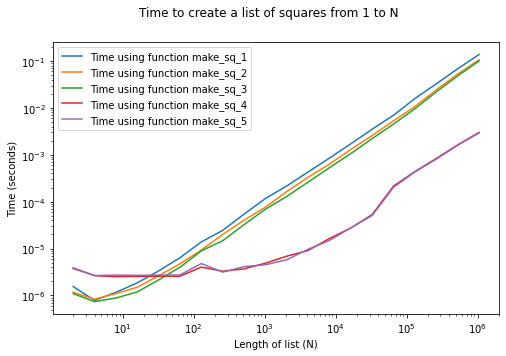

In [132]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4,make_sq_5]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)

plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises

1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

Put your solutions here.

EXERCISE 1

the make_sq_4 function is significantly faster for long lists,

for shorter lists make_sq_3 is more efficent on average than the rest.

the switch happens around 100, so use make_sq3 for 0-100 and make_sq_4 for 100 on

EXERCISE 2

Ok this one was hard because you basically covered most of the methods of making lists and I really wanted to try to beat the efficency, I added the make_sq_5 above and added it to the plot as well. Basically a compressed version of make_sq_4 but only one line and reads better

EXERCISE 3

In [155]:
def inflate(S):
  output = ""
  for j,letter in enumerate(S):
    output += letter*(j + 1)
  return output



In [156]:
inflate("Hello")

'Heelllllllooooo'

# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

I chose to do challenges 2 and 5, to make it easier for grading I just removed the text of challenges 1,3, and 4, thanks.

# Challenge 2

If $r$ is a positive real number, then the area of the circle of radius $r$ is $\pi r^2$.  If you place this circle around the origin, on a sheet of graph paper, then you will find *about* $\pi r^2$ "grid points" inside this circle.  The grid points inside the circle form the set
$$S = \{ (x,y) \in {\mathbb Z}^2 : x^2 + y^2 < r^2 \}.$$

Define $E(r) = \pi r^2 - \# S$ to be the "error" -- the difference between the area of the circle and the number of grid points within the circle.  

Create a plot with $r$ on the horizontal axis and $E(r)$ on the y-axis.  Try to accomplish this as efficiently as possible, where $r$ ranges from $0$ to $1000$.

Can you come up with a good bound $\vert E(r) \vert \leq f(r)$ for some nice function $f(r)$, just by looking at your plot?  I.e., your plot of $E(r)$ should be bounded above by the graph of $y = f(r)$ and below by the graph of $y = -f(r)$.  If you can come up with such a bound, plot it too.


###My Notes For This Challenge

This problem was so interesting, Here are some Ideas I had that I didn't have time to implement but I thought were interesting.

My loop is super inefficent, one way I thought of improving on this is that I dont need to recalculate old grid points that I already know exist, every new circle fully contains the old circle and I don't need to recalculate the old grid points. An elegant solution for this didnt immediately pop out at me and I didnt have time to explore it to the depths that I would have liked I just wanted you to know I was thinking about it.

In terms of finding the upper bound I wasn't sure if to give it an analytical approach or just try values at the graph and see what stuck. My analysis of that is below.

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [306]:
#create lists
grid_points = []
pi_solutions = []
errors = []
num_grid_points = 0
#outer loop to run 1000 times (inefficent algorithim sorry [see notes above])
for r in range(0, 1001):
  num_grid_points = 0
  pi_solution = 0
  r_squared = r*r #declare this once so I don't have to calculate it in every loop
  for x in range(-r,r+1): #loop x from -r to r (circle)
    x_squared = x*x #declare this in the outer loop so it only gets run N times instead of N*N
    for y in range(-r,r+1): #same loop for y
      if(x_squared + y*y <= r_squared): #my understanding of the conditon for grid points, x^2 + y^2 is  less than r^2 
        num_grid_points += 1 #increment if true
  pi_solution = math.pi * r_squared #calculate the true are with pi
  Error = abs(pi_solution - num_grid_points) #calculate the error
  grid_points.append(num_grid_points)

  #add values to respective lists
 
  pi_solutions.append(pi_solution)
  errors.append(Error)



let's see a snippet of what the lists look like

In [308]:
print("Grid Points:", grid_points[0:10])
print("Pi Areas:", pi_solutions[0:10])

Grid Points: [1, 5, 13, 29, 49, 81, 113, 149, 197, 253]
Pi Areas: [0.0, 3.141592653589793, 12.566370614359172, 28.274333882308138, 50.26548245743669, 78.53981633974483, 113.09733552923255, 153.93804002589985, 201.06192982974676, 254.46900494077323]


looks good to me!

So at this point I had a list of number of grid points, a list of areas and a list of errors and I wanted to graph them

In [ ]:
N = 1001
x_array = np.arange(N) #make x coords

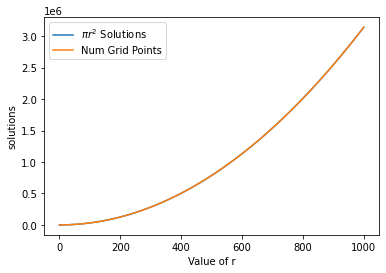

In [307]:
plt.plot(x_array, pi_solutions, label= "$\pi r^2$ Solutions")
plt.plot(x_array,grid_points, label="Num Grid Points" )


plt.xlabel('Value of r')
plt.ylabel('solutions')

plt.legend()
plt.show()

This graph was kind of disapointing, theyre so close to on top of eachother you cant really see a difference, and yeah I confirmed theyre both really there. You can print out the arrays and see theyre different values too.

Then the graph of the errors

Text(0, 0.5, 'error')

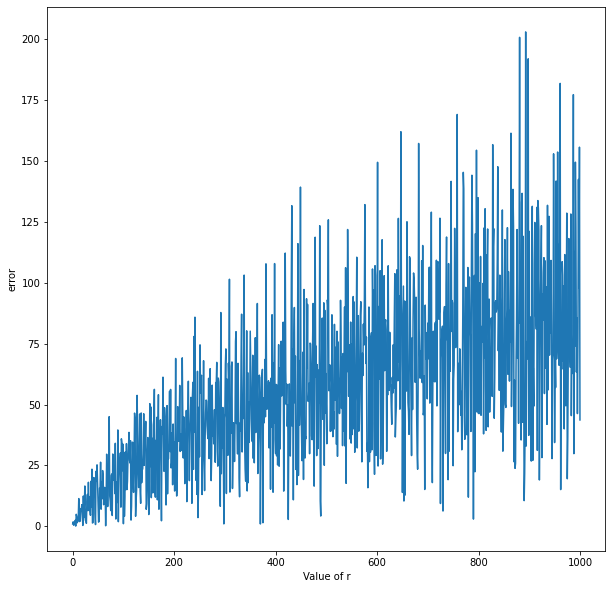

In [309]:
plt.figure(figsize=(10,10))
plt.plot(x_array, errors, label="errors")
plt.xlabel('Value of r')
plt.ylabel('error')

Well It looks really crazy. kind of what you would expect. Luckily I did challenge 5 earlier and I can clean this up a little using a 7 index rolling average. combining two worlds here, I know, crazy. To see where the rolling() function is from, see my solution for challenge 5

In [ ]:
def rolling(A, window=7):
  windows = [] #create list to hold windows
  for current in range(0,len(A)-7): #keep track of back index (start of window) current = index here
    slice = A[current: current + window] #get a window of current to 7 after current using list slicing
    total_sum = sum(slice) #sum the slice
    window_avg = total_sum / window #divide by 7(window) to get avg 
    windows.append(window_avg) #add avg to list of avgs
  return windows #return list of avgs

In [277]:
errors_avg = rolling(errors,7)

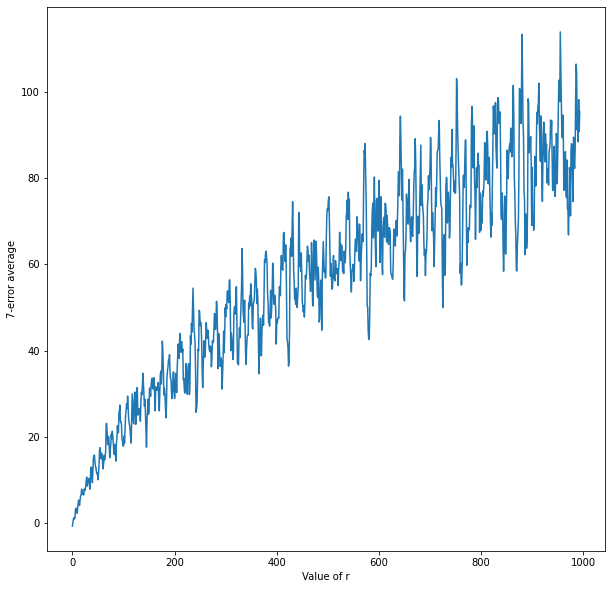

In [348]:
x_array_errors = np.arange(994)
plt.figure(figsize=(10,10))
plt.plot(x_array_errors, errors_avg)
plt.xlabel('Value of r')
plt.ylabel('7-error average')
plt.show()
     

Yeah it cleaned it up a little but nothing crazy. I was hoping it would be more substantial and would help me visualize an upper bound type scenario. no matter, I think the upper bound is going to be a multiple of $\pi r$ because we are dealing with circles after all. the shape looks kind of like it could be a multiple of $\sqrt{x}$ in how it curves. 

I'm glad I looked at the 7 index rolling average because I dont think i would have made the $\sqrt{x}$ connection otherwise but we have to look at the actual one for testing values. So first I just tried $f(r) = \pi\sqrt{x} $ and it was about halfway down so i multiplied it by 2 to and got $f(r) =2 \pi \sqrt{x}$ and that one was honestly really good with just three or four peaks breaking through. So I needed a multiplier just bigger than 2, and i don't know why but the first just larger than 2 number I thought of was $\sqrt5$ so i went for it and what you see below is the graph of my_guess which is $f(r) = \sqrt5 \pi \sqrt{x} $ 

In [344]:
my_guess = []
for i in range(1001):
  my_guess.append(math.sqrt(i)*math.pi*math.sqrt(5))

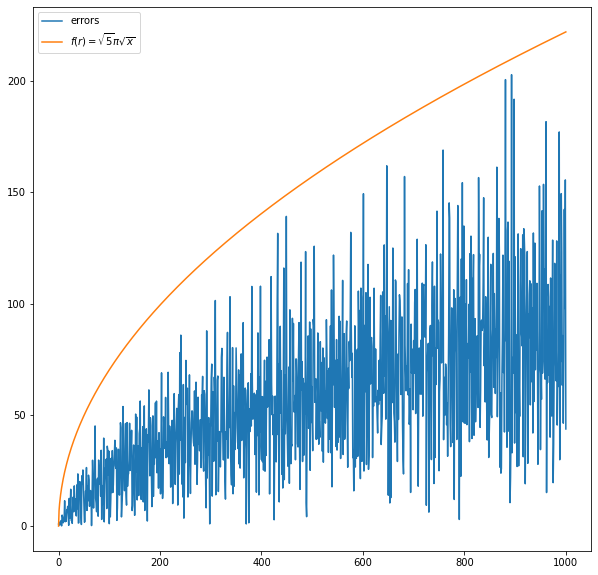

In [347]:
plt.figure(figsize=(10,10))
plt.plot(x_array, errors, label="errors")
plt.plot(x_array, my_guess, label= "$f(r) = \sqrt{5} \pi \sqrt{x}$")

plt.xlabel('Value of r')
plt.ylabel('error')

plt.legend()
plt.show()

And I gotta say i'm pretty happy with that upper bound, it covers everything with just the right shape and its an absolute bound nothing crosses it. And there it is, this challenge was really fun.

# Challenge 5

Often when visualizing time-series data, it makes sense to look not at day-by-day changes, but rather at a 7-day rolling average.  For example, when looking at Covid-19 cases, there are reporting fluctuations from day to day, so instead it is usually better to look at the average number of cases over the previous 7 days.

Write a function `def rolling(A, window=7):` which takes as input a one-dimensional numpy array `A`, and a parameter `window` whose default value is `7`.  The function must return an array `R` whose length is shorter than the length of `A`.  The entry `R[j]` should be the **average** of `A[j]`, `A[j+1]`, etc., up to `A[j+window-1]`.  

Then use this function and matplotlib to produce a plot:  a line plot of the array `A` produced below, and a line plot of the 7-day rolling average `R` produced by your function.  These plots should be on the same figure, and clearly labeled.


In [188]:
# Here is the code to produce your test array A.
# Please use this array in your plot!

#produce test array
x_array = np.arange(300)
x_array_windows = np.arange(293)
A = 5*(x_array/200)**2
A = A + np.random.random(len(A))

In [195]:
def rolling(A, window=7):
  windows = [] #create list to hold windows
  for current in range(0,len(A)-7): #keep track of back index (start of window) current = index here
    slice = A[current: current + window] #get a window of current to 7 after current using list slicing
    total_sum = sum(slice) #sum the slice
    window_avg = total_sum / window #divide by 7(window) to get avg 
    windows.append(window_avg) #add avg to list of avgs
  return windows #return list of avgs

In [190]:
windows = rolling(A,7) #run method

In [191]:
#import matplotlib
import matplotlib.pyplot as plt

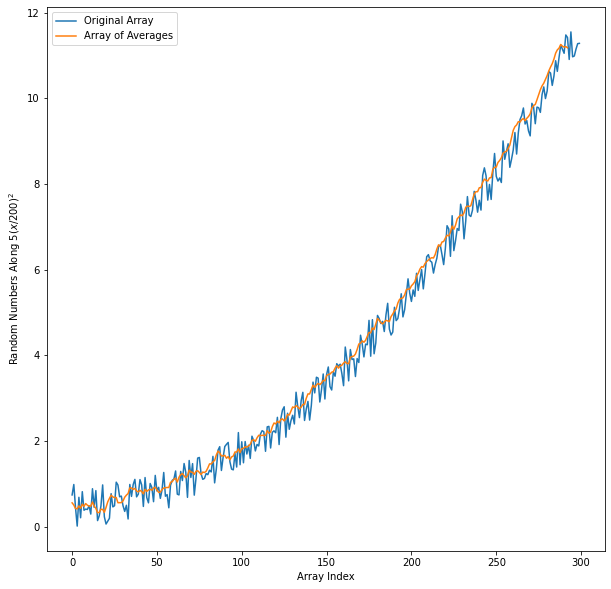

In [197]:
 
#plot the avg over the orig
plt.figure(figsize=(10,10))
plt.plot(x_array, A, label= "Original Array")
plt.plot(x_array_windows,windows, label="Array of Averages")
plt.xlabel('Array Index')
plt.ylabel('Random Numbers Along $5(x/200)^2$')

plt.legend()
plt.show()

